In [1]:
import cv2
import os
import numpy as np
import matplotlib .pyplot as plt
import random
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer , Conv2D , Dense , MaxPooling2D , Input , Flatten
import tensorflow as tf

import warnings   
warnings.filterwarnings('ignore') 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
POS_PATH = os.path.join('data','positive')
NEG_PATH = os.path.join('data','negative')
ANC_PATH = os.path.join('data','anchor')

In [4]:
pwd

'C:\\Users\\Mostafa\\Downloads\\Artificial Intelligence'

In [5]:
import os
os.getcwd( )

'C:\\Users\\Mostafa\\Downloads\\Artificial Intelligence'

In [6]:
os.chdir('D:\AI') 

In [7]:
pwd

'D:\\AI'

In [9]:
#os.makedirs(POS_PATH)
#os.makedirs(NEG_PATH)
#os.makedirs(ANC_PATH)

In [9]:
pwd

'D:\\AI'

In [11]:
!tar -xf lfw-funneled.tgz

In [12]:
for directory in os.listdir('lfw_funneled'):
    for file in os.listdir(os.path.join('lfw_funneled', directory)):
        EX_PATH = os.path.join('lfw_funneled', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

NotADirectoryError: [WinError 267] The directory name is invalid: 'lfw_funneled\\pairs.txt'

In [13]:
cv2.waitKey??

In [16]:
'{}.jpg'.format(uuid.uuid1())

'36bdaaa1-7db1-11ee-b06f-d7a41df1f0db.jpg'

In [15]:
import uuid
uuid.uuid1()

UUID('3518f12c-7db1-11ee-91dc-d7a41df1f0db')

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret , frame = cap.read()
    
    frame = frame[120:250+180,200:250+250,:]
    
    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
        
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
    
    cv2.imshow('Image Collection',frame)
    
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

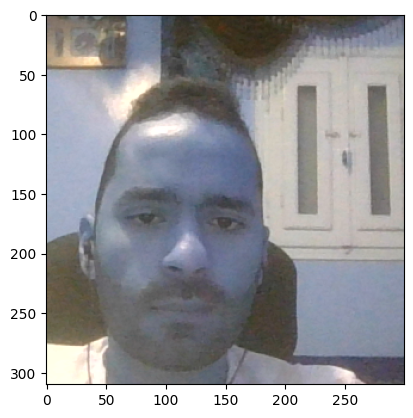

In [18]:
plt.imshow(frame)

In [19]:
frame.shape

(310, 300, 3)

In [20]:
frame[:250,:250,:].shape

(250, 250, 3)

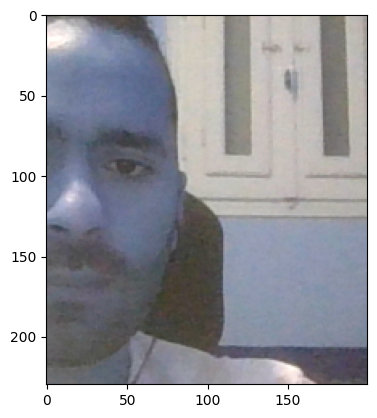

In [21]:
plt.imshow(frame[80:250+180,100:250+250,:])

# Load and preprocess images 

In [22]:
anchor = tf.data.Dataset.list_files(ANC_PATH +'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH +'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH +'\*.jpg').take(300)

In [23]:
ANC_PATH +'\*.jpg'

'data\\anchor\\*.jpg'

In [24]:
dir_test = anchor.as_numpy_iterator()

In [25]:
dir_test.next()

b'data\\anchor\\d8fdf893-7a71-11ee-a510-d7a41df1f0db.jpg'

In [26]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img,(100,100))
    img = img / 255.0
    return img

In [27]:
img = preprocess(b'data\\anchor\\d92451e6-7a71-11ee-8d7a-d7a41df1f0db.jpg')

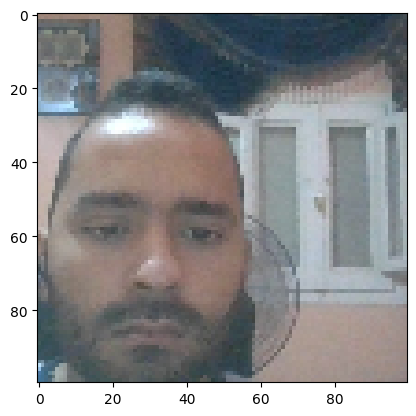

In [28]:
plt.imshow(img)

In [29]:
img.numpy().min()

0.097058825

In [30]:
img.numpy().max()

1.0

In [31]:
tf.ones_like([1,2,3,4,5])

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 1, 1, 1])>

In [32]:
class_labels =  tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [33]:
iterator_labs = class_labels.as_numpy_iterator()

In [34]:
iterator_labs.next()

0.0

In [35]:
positives = tf.data.Dataset.zip((anchor, positive , tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative , tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data =  positives.concatenate(negatives)

In [36]:
samples = data.as_numpy_iterator()

In [37]:
exampple = samples.next()

In [38]:
def preprocess_twin( input_img , validation_img , label ):
    return(preprocess(input_img),preprocess(validation_img),label)

In [39]:
res = preprocess_twin(*exampple)

In [40]:
res[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.6315686 , 0.52960783, 0.47862747],
        [0.6433333 , 0.54137254, 0.48999998],
        [0.6243137 , 0.52235293, 0.47098038],
        ...,
        [0.20470588, 0.26686275, 0.32960784],
        [0.16647059, 0.22098039, 0.27215686],
        [0.27392155, 0.31313726, 0.35980392]],

       [[0.6070588 , 0.5219608 , 0.47215688],
        [0.62666667, 0.5388235 , 0.4839216 ],
        [0.6037255 , 0.51980394, 0.46490198],
        ...,
        [0.22019608, 0.26725492, 0.33      ],
        [0.23137255, 0.27058825, 0.31647056],
        [0.2690196 , 0.29529414, 0.3254902 ]],

       [[0.45882353, 0.42843136, 0.40490195],
        [0.45686275, 0.42647058, 0.40294117],
        [0.46078432, 0.4392157 , 0.4117647 ],
        ...,
        [0.20196079, 0.2372549 , 0.30392158],
        [0.2764706 , 0.30882353, 0.35      ],
        [0.2617647 , 0.28137255, 0.29705882]],

       ...,

       [[0.34313726, 0.47941175, 0.5441176 ],
        [0.31

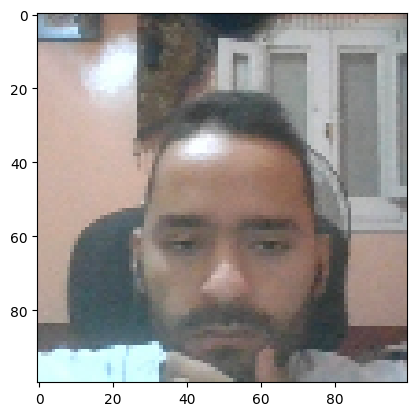

In [41]:
plt.imshow(res[1])

In [42]:
res[2]

1.0

In [43]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [44]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [45]:
samples = data.as_numpy_iterator()

In [46]:
len(samples.next())

3

In [47]:
samples.next()[0]

array([[[0.6198039 , 0.53313726, 0.48274508],
        [0.6154902 , 0.52862746, 0.4862745 ],
        [0.61607844, 0.52568626, 0.49392155],
        ...,
        [0.1890196 , 0.25137255, 0.30980393],
        [0.22392157, 0.26313725, 0.30980393],
        [0.22215685, 0.24901961, 0.28843138]],

       [[0.57137257, 0.4919608 , 0.48196083],
        [0.61274517, 0.5339216 , 0.51431376],
        [0.5976471 , 0.5221569 , 0.49470592],
        ...,
        [0.23352942, 0.27941176, 0.32647058],
        [0.2619608 , 0.29725492, 0.32352942],
        [0.27607843, 0.29568627, 0.3107843 ]],

       [[0.422549  , 0.4107843 , 0.41568628],
        [0.42352942, 0.4107843 , 0.41862744],
        [0.42647058, 0.4137255 , 0.422549  ],
        ...,
        [0.25      , 0.28921568, 0.327451  ],
        [0.25392157, 0.29313725, 0.29509804],
        [0.28039217, 0.30686274, 0.29803923]],

       ...,

       [[0.22843137, 0.33235294, 0.36568627],
        [0.2901961 , 0.3745098 , 0.41568628],
        [0.23235294, 0

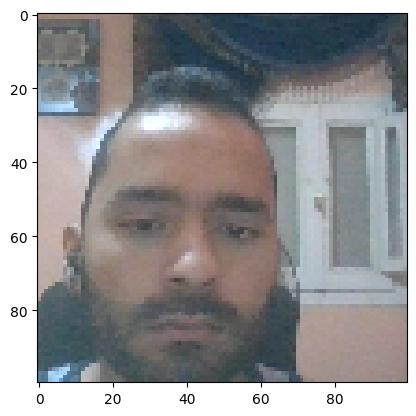

In [48]:
plt.imshow(samples.next()[0])

In [49]:
samp = samples.next()

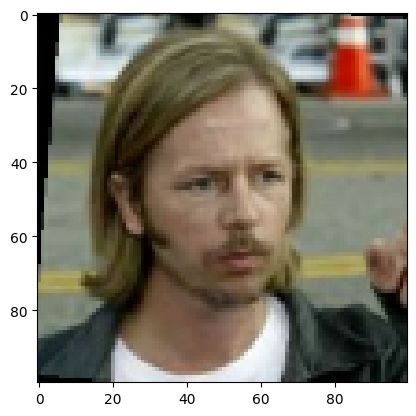

In [50]:
plt.imshow(samp[1])

In [51]:
samp[2]

0.0

In [52]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [53]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [54]:
train_samples = train_data.as_numpy_iterator()
train_sample = train_samples.next()

In [55]:
len(train_sample[0])

16

In [56]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [57]:
inp = Input(shape=(105,105,3),name='input_shape')
inp

<KerasTensor: shape=(None, 105, 105, 3) dtype=float32 (created by layer 'input_shape')>

In [58]:
c1 = Conv2D(64,(10,10),activation='relu')(inp)
c1

<KerasTensor: shape=(None, 96, 96, 64) dtype=float32 (created by layer 'conv2d')>

In [59]:
m1 = MaxPooling2D(64,(2,2),padding='same')(c1)
m1

<KerasTensor: shape=(None, 48, 48, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [60]:
def make_embedding():
    inp = Input(shape=(100,100,3),name='input_shape')
    
    c1 = Conv2D(64,(10,10),activation='relu')(inp)
    m1 = MaxPooling2D(64,(2,2),padding='same')(c1)
    
    c2 = Conv2D(128,(7,7),activation='relu')(m1)
    m2 = MaxPooling2D(64,(2,2),padding='same')(c2)
    
    c3 = Conv2D(128,(4,4),activation='relu')(m2)
    m3 = MaxPooling2D(64,(2,2),padding='same')(c3)
    
    c4 = Conv2D(256,(4,4),activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096,activation='sigmoid')(f1)
    
    return Model(inputs=[inp],outputs = [d1] ,name = 'embadding')

In [61]:
embedding = make_embedding()

In [62]:
embedding.summary()

Model: "embadding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 128)       26

In [63]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()
        
    def call(self,input_emabadding,validation_embedding):
        return tf.math.abs( input_emabadding - validation_embedding )


In [64]:
l1 = L1Dist()
l1

In [65]:
#l1(anchor_embedding,validation_embedding)

In [66]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [67]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [68]:
siamese_layer = L1Dist()
distances = siamese_layer(inp_embedding,val_embedding)

In [69]:
classifier = Dense(1,activation='sigmoid')(distances)

In [70]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [71]:
sia_network = Model(inputs=[input_image , validation_image] , outputs = classifier , name = 'SiameseNetw')

In [72]:
def make_siamese_model():
    
    input_image = Input(name='input_img', shape=(100,100,3))
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image) , embedding(validation_image))
    
    classifier = Dense(1,activation='sigmoid')(distances)
    return Model(inputs=[input_image , validation_image] , outputs = classifier , name = 'SiameseNetw')

In [73]:
siamese_model = make_siamese_model()

In [74]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [75]:
opt = tf.keras.optimizers.Adam(1e-4)

In [76]:
checkpoint_dir = './training_check'
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt , siamese_model = siamese_model)

In [77]:
test_batch = train_data.as_numpy_iterator()

In [78]:
batch_1 = test_batch.next()

In [79]:
batch_1[0]

array([[[[0.61960787, 0.53294116, 0.47843137],
         [0.627451  , 0.5411765 , 0.49019608],
         [0.60843134, 0.53333336, 0.4790196 ],
         ...,
         [0.23529412, 0.28627452, 0.31764707],
         [0.2082353 , 0.262549  , 0.27450982],
         [0.23960784, 0.27882352, 0.27490196]],

        [[0.60568625, 0.51666665, 0.48705882],
         [0.59725493, 0.5088235 , 0.4780392 ],
         [0.6017647 , 0.5133333 , 0.482549  ],
         ...,
         [0.1972549 , 0.24823529, 0.2784314 ],
         [0.24019608, 0.28392157, 0.29058826],
         [0.2901961 , 0.3254902 , 0.32156864]],

        [[0.46862745, 0.41862744, 0.42156863],
         [0.46568626, 0.40882352, 0.40980393],
         [0.46470588, 0.41568628, 0.40490195],
         ...,
         [0.23529412, 0.2764706 , 0.3009804 ],
         [0.28431374, 0.3127451 , 0.32156864],
         [0.28235295, 0.3009804 , 0.3127451 ]],

        ...,

        [[0.34313726, 0.5176471 , 0.65294117],
         [0.2735294 , 0.42941177, 0.5568628 ]

In [80]:
batch_1[2]

array([0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [81]:
@tf.function
def train_step(batch):
    
    with tf.GradientTape() as tape:     
        X = batch[:2]
        y = batch[2]
        
        yhat = siamese_model(X, training=True)
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    return loss

In [82]:
def train(data, EPOCHS):
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        for idx, batch in enumerate(data):
            train_step(batch)
            progbar.update(idx+1)
        
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [83]:
EPOCHS = 10
train(train_data, EPOCHS)


 Epoch 1/10
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
3/3 [==============================] - 36s 10s/step

 Epoch 2/10
3/3 [==============================] - 35s 10s/step

 Epoch 3/10
3/3 [==============================] - 36s 10s/step

 Epoch 4/10
3/3 [==============================] - 36s 10s/step

 Epoch 5/10
3/3 [==============================] - 36s 10s/step

 Epoch 6/10
3/3 [==============================] - 37s 10s/step

 Epoch 7/10
3/3 [==============================] - 37s 10s/step

 Epoch 8/10
3/3 [==============================] - 36s 10s/step

 Epoch 9/10
3/3 [==============================] - 37s 10s/step

 Epoch 10/10
3/3 [==============================] - 37s 10s/step


In [84]:
from tensorflow.keras.metrics  import Precision , Recall

In [85]:
test_input , test_val , y_true = test_data.as_numpy_iterator().next()

In [86]:
test_var = test_data.as_numpy_iterator().next()

In [87]:
len(test_var[0])

16

In [88]:
len(test_var)

3

In [89]:
test_var[2]

array([0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [90]:
y_hat = siamese_model.predict([test_input,test_val])
y_hat

1/1 [==============================] - 1s 1s/step


array([[9.9933004e-01],
       [9.9966943e-01],
       [4.2341690e-06],
       [1.5656698e-05],
       [9.9283838e-01],
       [9.9870139e-01],
       [1.1697376e-05],
       [2.2592882e-05],
       [9.9669743e-01],
       [9.9949539e-01],
       [9.8480632e-06],
       [9.9962032e-01],
       [7.3215706e-06],
       [9.9493831e-01],
       [1.1870389e-05],
       [9.9489474e-01]], dtype=float32)

In [91]:
#res = []
#for prediction in y_hat :
 #   if prediction > 0.5 :
  #      res.append(1)
   # else:
    #    res.append(0)

In [92]:
[ 1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1]

In [93]:
y_true

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.],
      dtype=float32)

In [94]:
m = Recall()
m.update_state(y_true,y_hat)
m.result().numpy()

1.0

In [95]:
m = Precision()
m.update_state(y_true,y_hat)
m.result().numpy()

1.0

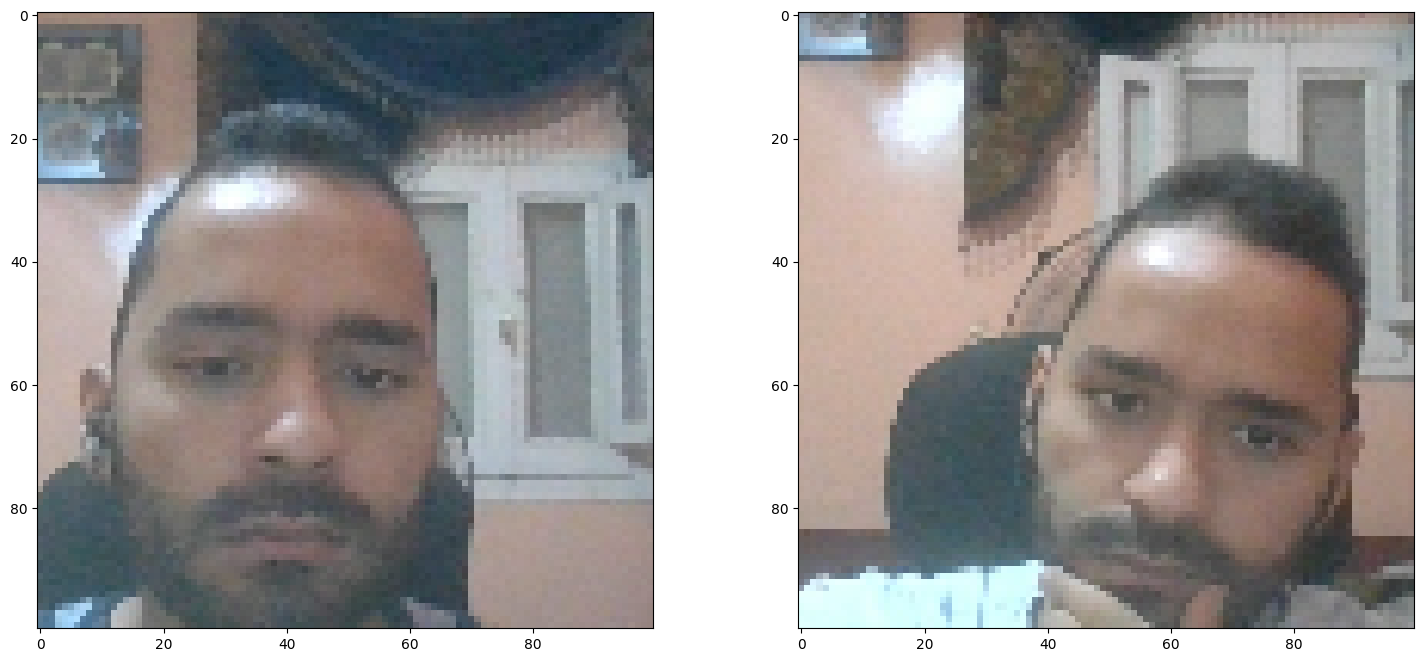

In [96]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(test_input[0])
plt.subplot(1,2,2)
plt.imshow(test_val[0])
plt.show()

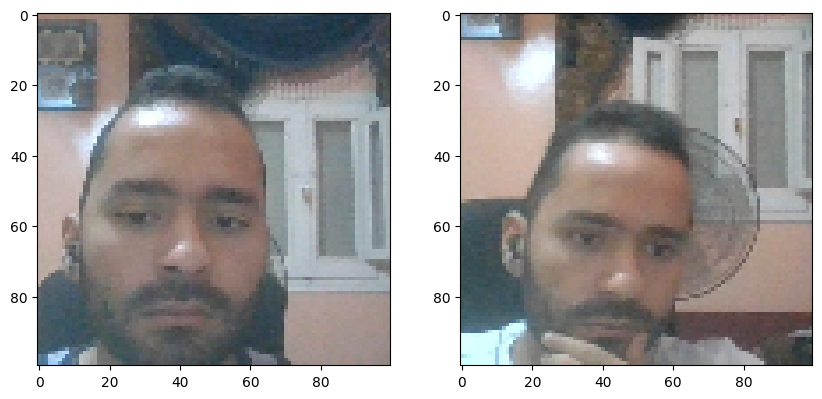

In [97]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(test_input[1])
plt.subplot(1,2,2)
plt.imshow(test_val[1])
plt.show()

In [ ]:
plt.subplot??

In [ ]:
pip install h5py

In [98]:
import h5py

In [99]:
siamese_model.save('siamese.h5')

C:\Users\Mostafa\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
model = tf.keras.models.load_model('siamese.h5',
                                  custom_objects = { 'L1Dist':L1Dist  , 
                                                   'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [102]:
tf.keras.models.load_model??

In [103]:
model.predict([test_input,test_val])

1/1 [==============================] - 1s 1s/step


array([[9.9933004e-01],
       [9.9966943e-01],
       [4.2341690e-06],
       [1.5656698e-05],
       [9.9283838e-01],
       [9.9870139e-01],
       [1.1697376e-05],
       [2.2592882e-05],
       [9.9669743e-01],
       [9.9949539e-01],
       [9.8480632e-06],
       [9.9962032e-01],
       [7.3215706e-06],
       [9.9493831e-01],
       [1.1870389e-05],
       [9.9489474e-01]], dtype=float32)

In [10]:
os.path.join('application_data' , 'verification_data')

'application_data\\verification_data'

In [11]:
os.listdir(os.path.join('application_data' , 'verification_data'))

['c4d9c37f-7b10-11ee-9bf1-d7a41df1f0db.jpg',
 'c4f87284-7b10-11ee-b022-d7a41df1f0db.jpg',
 'c516a8f9-7b10-11ee-b106-d7a41df1f0db.jpg',
 'c5d0d5a8-7b10-11ee-901a-d7a41df1f0db.jpg',
 'c5e0165f-7b10-11ee-adbc-d7a41df1f0db.jpg',
 'c5f4ba37-7b10-11ee-82b5-d7a41df1f0db.jpg',
 'c634c96f-7b10-11ee-99fb-d7a41df1f0db.jpg',
 'c648b862-7b10-11ee-89d3-d7a41df1f0db.jpg',
 'c685c2d8-7b10-11ee-837d-d7a41df1f0db.jpg',
 'e20121a0-7b10-11ee-826d-d7a41df1f0db.jpg',
 'e27b32fd-7b10-11ee-8e0c-d7a41df1f0db.jpg',
 'e2ebf85d-7b10-11ee-a298-d7a41df1f0db.jpg',
 'e3023b49-7b10-11ee-8ddb-d7a41df1f0db.jpg',
 'e3506b6d-7b10-11ee-a7b6-d7a41df1f0db.jpg',
 'e35fc7ce-7b10-11ee-95df-d7a41df1f0db.jpg',
 'e36eef4d-7b10-11ee-9e60-d7a41df1f0db.jpg',
 'e37e62fc-7b10-11ee-80aa-d7a41df1f0db.jpg',
 'e38db23d-7b10-11ee-9591-d7a41df1f0db.jpg',
 'e39a804a-7b10-11ee-8e97-d7a41df1f0db.jpg',
 'e3af3b51-7b10-11ee-a940-d7a41df1f0db.jpg',
 'e3be47ae-7b10-11ee-8932-d7a41df1f0db.jpg',
 'e3cd7db9-7b10-11ee-96d6-d7a41df1f0db.jpg',
 'e3dcfcec

In [14]:
os.path.join('application_data','input_data','input_image.jpg')

'application_data\\input_data\\input_image.jpg'

In [ ]:
def verify(frame , model , detection_threshold , verification_threshold):
    results = []
    for image in os.listdir(os.path.join('application_data' , 'verification_data')):
        input_image = preprocess(os.path.join('application_data','input_data','input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_data',image))
        
        result = model.predict(list(np.expand_dims([input_image,validation_img],axis=1)))
        results.append(result)
        
    detection = np.sum(np.array(results) > detection_threshold)
    
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_data'))) 
    verified = verification > verification_threshold
    
    return results, verified


In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('v'):
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'verify' is not defined